In [1]:
#dataframes
import pandas as pd
import h5py

#speedup
import multiprocessing as mp

#suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.TimeSeries = pd.Series 

#math
import numpy as np
import math as m
from scipy.spatial.distance import cdist
from scipy import signal

#plots
import pylab as plt
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib
from figurefirst import FigureLayout,mpl_functions
import figurefirst
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import make_axes_locatable # for colorbar
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
import figurefirst as fifi
from IPython.display import display,SVG

#misc
import cairosvg
import string
import time
np.set_printoptions(suppress=True)
# matplotlib.rcParams['font.family'] = [ 'sans-serif']
FS=7

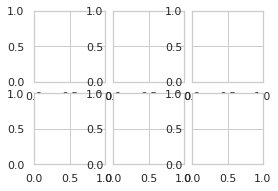

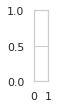

In [2]:
layout = fifi.svg_to_axes.FigureLayout('../../../Figure/fig5.svg',
                                           autogenlayers=True, make_mplfigures=True, hide_layers=[])

### Mean Concentration

In [3]:
fdf1 = pd.read_hdf("~/DataAnalysis/data/Sprints/HighRes/Windy/WindyStatsTime_std.h5")
fdf2 = pd.read_hdf("~/DataAnalysis/data/Sprints/HighRes/NotWindy/NotWindyStatsTime_std.h5")
fdf3 = pd.read_hdf("~/DataAnalysis/data/Sprints/HighRes/Forest/ForestStatsTime_std.h5")

In [4]:
ax=layout.axes[('fig1','a')]

ax.grid(False)
var1 = ax.scatter(fdf1.log_avg_dist_from_source_signed, fdf1.mean_concentration, 
                   c=fdf1.mean_concentration, cmap='inferno_r', s=4,
            edgecolors='none', alpha=0.2, vmin=4, vmax=10, rasterized=True)
g1 = sns.regplot(x="log_avg_dist_from_source_signed",y="mean_concentration", data=fdf1, 
            ax=ax, line_kws={'color':'red','linewidth':1}, scatter=False, truncate=False)
g1.set(xlabel=None, ylabel=None)
mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 5}, 
                            smart_bounds=True,
                            yticks=[4.5,10],
                            linewidth=0.5)

ax.set_rasterization_zorder(-20)
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../../Figure/fig5.svg')

In [5]:
ax=layout.axes[('fig1','b')]

var1 = ax.scatter(fdf2.log_avg_dist_from_source_signed, fdf2.mean_concentration, 
                   c=fdf2.mean_concentration, cmap='inferno_r', s=4,
            edgecolors='none', alpha=0.2, vmin=4, vmax=10,  rasterized=True)
g1 = sns.regplot(x="log_avg_dist_from_source_signed",y="mean_concentration", data=fdf2, 
            ax=ax, line_kws={'color':'red','linewidth':1}, scatter=False, truncate=False)
g1.set(xlabel=None, ylabel=None)
mpl_functions.adjust_spines(ax,['none'],
                            spine_locations={}, 
                            smart_bounds=True,
                            yticks=[4.5,10],
                            linewidth=1)
ax.grid('False')
ax.axis('off')
ax.set_rasterization_zorder(-20)

figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../../Figure/fig5.svg')

In [6]:
ax=layout.axes[('fig1','c')]

var1 = ax.scatter(fdf3.log_avg_dist_from_source_signed, fdf3.mean_concentration, 
                   c=fdf3.mean_concentration, cmap='inferno_r', s=4,
            edgecolors='none', alpha=0.2, vmin=4, vmax=10,rasterized=True)
g1 = sns.regplot(x="log_avg_dist_from_source_signed",y="mean_concentration", data=fdf3, 
            ax=ax, line_kws={'color':'red','linewidth':1}, scatter=False, truncate=False)
g1.set(xlabel=None, ylabel=None)
mpl_functions.adjust_spines(ax,['none'],
                            spine_locations={}, 
                            smart_bounds=True,
                            yticks=[4.5,10],
                            linewidth=1)
ax.set_rasterization_zorder(-20)
ax.grid('False')
ax.axis('off')
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../../Figure/fig5.svg')

### Whiff Frequency

In [7]:
ax1=layout.axes[('fig1','d')]

var1 = ax1.scatter(fdf1.log_avg_dist_from_source_signed, fdf1.mean_ef, 
                   c=fdf1.mean_concentration, cmap='inferno_r', s=4,rasterized=True,
            edgecolors='none', alpha=0.2, vmin=4, vmax=10)

g1 = sns.regplot(x="log_avg_dist_from_source_signed",y="mean_ef", data=fdf1, 
            ax=ax1, line_kws={'color':'red','linewidth':1}, scatter=False, truncate=False)
g1.set(xlabel=None, ylabel=None)
ax1.set_rasterization_zorder(-20)
ax1.grid('False')
mpl_functions.adjust_spines(ax1,['left','bottom'],
                            spine_locations={'left': 5, 'bottom': 5}, 
                            smart_bounds=True,
                            xticks=[-1,0,1,1.8],
                            yticks=[0,9],
                            linewidth=0.5)

ax1.set_xticklabels([r'$10^{-1}$',r'$10^{0}$', r'$10^{1}$',r'$10^{1.8}$'])


figurefirst.mpl_functions.set_fontsize(ax1, FS)

layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../../Figure/fig5.svg')

In [8]:
ax1=layout.axes[('fig1','e')]

var1 = ax1.scatter(fdf2.log_avg_dist_from_source_signed, fdf2.mean_ef, 
                   c=fdf2.mean_concentration, cmap='inferno_r', s=4,rasterized=True,
            edgecolors='none', alpha=0.2, vmin=4, vmax=10)


g1 = sns.regplot(x="log_avg_dist_from_source_signed",y="mean_ef", data=fdf2, 
            ax=ax1, line_kws={'color':'red','linewidth':1}, scatter=False, truncate=False)
g1.set(xlabel=None, ylabel=None)
ax1.set_rasterization_zorder(-20)

ax1.grid('False')
ax1.axis('off')
figurefirst.mpl_functions.set_fontsize(ax1, FS)

layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../../Figure/fig5.svg')


In [9]:
ax1=layout.axes[('fig1','f')]

var1 = ax1.scatter(fdf3.log_avg_dist_from_source_signed, fdf3.mean_ef, 
                   c=fdf3.mean_concentration, cmap='inferno_r', s=4,rasterized=True,
            edgecolors='none', alpha=0.2, vmin=4, vmax=10)

g1 = sns.regplot(x="log_avg_dist_from_source_signed",y="mean_ef", data=fdf3, 
            ax=ax1, line_kws={'color':'red','linewidth':1}, scatter=False, truncate=False)
g1.set(xlabel=None, ylabel=None)
ax1.set_rasterization_zorder(-20)

ax1.grid('False')
ax1.axis('off')
figurefirst.mpl_functions.set_fontsize(ax1, FS)

layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../../Figure/fig5.svg')
